In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import least_squares


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv('/content/drive/MyDrive/Datos/MMM_data.csv')

In [49]:
df.columns

Index(['wk_strt_dt', 'yr_nbr', 'qtr_nbr', 'prd', 'wk_nbr', 'wk_in_yr_nbr',
       'mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
       'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
       'mdip_sms', 'mdip_aff', 'mdip_sem', 'mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
       'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
       'mdsp_on', 'mdsp_sem', 'sales', 'me_ics_all', 'me_gas_dpg', 'st_ct',
       'mrkdn_valadd_edw', 'mrkdn_pdm', 'va_pub_0.15', 'va_pub_0.2',
       'va_pub_0.25', 'va_pub_0.3', 'hldy_Black Friday', 'hldy_Christmas Day',
       'hldy_Christmas Eve', 'hldy_Columbus Day', 'hldy_Cyber Monday',
       'hldy_Day after Christmas', 'hldy_Easter', 'hldy_Father's Day',
       'hldy_Green Monday', 'hldy_July 4th', 'hldy_Labor Day', 'hldy_MLK',
       'hldy_Memorial Day', 'hldy_Mother's Day', 'hldy_NYE',
       'hldy_New Year's Day', 'hldy_Pre Thanksgiving', 'hldy_Presidents Day',
       'hldy_Prime Day', 'hldy_Thanksgiving', 'hl

In [41]:
mdsp_columns = [col for col in df.columns if 'mdsp' in col]
mdsp_columns.append('sales')  # Añadimos la columna 'sales' a la lista
df_mdsp = df[mdsp_columns]


In [33]:
mdsp_columns = [col for col in df.columns if 'mdsp' in col]
mdsp_columns.append('sales')  # Añadimos la columna 'sales' a la lista
df_mdsp = df[mdsp_columns]


In [42]:
df_mdsp.columns


Index(['mdsp_dm', 'mdsp_inst', 'mdsp_nsp', 'mdsp_auddig', 'mdsp_audtr',
       'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem', 'sales'],
      dtype='object')

In [43]:
print('mdsp_sms' in df.columns)
print('mdsp_aff' in df.columns)
print('mdsp_em' in df.columns)


False
False
False


In [7]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split

def multiplicative_func(params, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13):
    return params[0] + params[1]*x1 + params[2]*x2 + params[3]*x3 + params[4]*x4 + params[5]*x5 + params[6]*x6 + params[7]*x7 + params[8]*x8 + params[9]*x9 + params[10]*x10 + params[11]*x11 + params[12]*x12 + params[13]*x13

def residuals_func(params, y, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13):
    return y - multiplicative_func(params, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13)

# Parámetros iniciales para la optimización
initial_guess = [1 for _ in range(14)]

variables = ['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr', 'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em', 'mdip_sms', 'mdip_aff', 'mdip_sem']
X = df[variables]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
result = least_squares(residuals_func, initial_guess, args=(y_train, *X_train.T.values))

# Hacer las predicciones
y_pred = multiplicative_func(result.x, *X_test.T.values)
X_pred = df[variables]

# Calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}%')


MAPE: 28.191176636439213%


In [9]:
print(result.x)

[ 1.98502534e+07  1.15208602e-01  1.10715022e-01  5.22857241e+00
  6.02647865e+00  1.34072444e-01  2.02780715e+00 -3.01523129e-01
 -5.97362831e-01  2.82663994e+00  4.75210146e-01 -5.83182733e+01
 -3.72205248e+00  2.23377880e+02]


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Calcular las métricas de evaluación
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Poner los resultados en una tabla
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse, rmse, mae, r2]
})

print(results)


  Metric         Value
0    MSE  1.111821e+15
1   RMSE  3.334398e+07
2    MAE  2.709231e+07
3    R^2  6.254281e-01


In [53]:
mdsp_cols = ['mdsp_dm', 'mdsp_inst', 'mdsp_nsp', 'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem']
roas = {
    'mdsp_dm': 0.792256,
    'mdsp_inst': 0.092988,
    'mdsp_nsp': 0.265144,
    'mdsp_auddig': 0.004467,
    'mdsp_audtr': 0.139329,
    'mdsp_vidtr': 0.178610,
    'mdsp_viddig': 0.019735,
    'mdsp_so': 0.121668,
    'mdsp_on': 0.234684,
    'mdsp_sem': 0.671001
}

df_mdsp_pred = pd.DataFrame(columns=mdsp_cols)

for mdsp_col in mdsp_cols:
    df_mdsp_pred[mdsp_col] = roas[mdsp_col] * multiplicative_func(result.x, *X_test.T.values)

df_mdsp_pred.head()


,mdsp_dm,mdsp_inst,mdsp_nsp,mdsp_auddig,mdsp_audtr,mdsp_vidtr,mdsp_viddig,mdsp_so,mdsp_on,mdsp_sem
0,6.425648e+07,7.541857e+06,2.150469e+07,362299.163583,1.130038e+07,1.448629e+07,1.600621e+06,9.867968e+06,1.903421e+07,5.442201e+07
1,8.208238e+07,9.634103e+06,2.747048e+07,462807.446182,1.443530e+07,1.850505e+07,2.044662e+06,1.260552e+07,2.431464e+07,6.951965e+07
2,7.305509e+07,8.574560e+06,2.444932e+07,411908.610053,1.284773e+07,1.646989e+07,1.819793e+06,1.121918e+07,2.164056e+07,6.187398e+07
3,7.040331e+07,8.263318e+06,2.356185e+07,396957.051876,1.238138e+07,1.587206e+07,1.753738e+06,1.081195e+07,2.085504e+07,5.962807e+07
4,6.856813e+07,8.047920e+06,2.294767e+07,386609.660396,1.205864e+07,1.545833e+07,1.708024e+06,1.053012e+07,2.031142e+07,5.807376e+07


In [54]:
mdsp_total = df_mdsp_pred.sum()
mdsp_total = pd.DataFrame(mdsp_total, columns=['mdsp_total'])
mdsp_total


,mdsp_total
mdsp_dm,3.699389e+09
mdsp_inst,4.342015e+08
mdsp_nsp,1.238073e+09
mdsp_auddig,2.085837e+07
mdsp_audtr,6.505879e+08
mdsp_vidtr,8.340080e+08
mdsp_viddig,9.215132e+07
mdsp_so,5.681210e+08
mdsp_on,1.095842e+09
mdsp_sem,3.133196e+09


In [55]:
mdsp_total['percentage'] = (mdsp_total['mdsp_total'] / mdsp_total['mdsp_total'].sum()) * 100
mdsp_total


,mdsp_total,percentage
mdsp_dm,3.699389e+09,31.440202
mdsp_inst,4.342015e+08,3.690173
mdsp_nsp,1.238073e+09,10.522080
mdsp_auddig,2.085837e+07,0.177270
mdsp_audtr,6.505879e+08,5.529187
mdsp_vidtr,8.340080e+08,7.088030
mdsp_viddig,9.215132e+07,0.783172
mdsp_so,5.681210e+08,4.828321
mdsp_on,1.095842e+09,9.313293
mdsp_sem,3.133196e+09,26.628271


In [56]:
mdsp_columns = [col for col in df.columns if col.startswith('mdsp_')]
df_mdsp = df[mdsp_columns]


# Sumar los valores originales de 'mdsp' en el dataframe 'df'
mdsp_original = df_mdsp.sum()

# Añadir las sumas originales al dataframe 'mdsp_total'
mdsp_total['mdsp_original'] = mdsp_original

# Calcular los porcentajes originales
mdsp_total['percentage_original'] = (mdsp_total['mdsp_original'] / mdsp_total['mdsp_original'].sum()) * 100

mdsp_total


,mdsp_total,percentage,mdsp_original,percentage_original
mdsp_dm,3.699389e+09,31.440202,1.583734e+08,32.260263
mdsp_inst,4.342015e+08,3.690173,1.661025e+07,3.383466
mdsp_nsp,1.238073e+09,10.522080,5.320363e+07,10.837447
mdsp_auddig,2.085837e+07,0.177270,8.034650e+05,0.163664
mdsp_audtr,6.505879e+08,5.529187,2.562472e+07,5.219691
mdsp_vidtr,8.340080e+08,7.088030,3.514515e+07,7.158981
mdsp_viddig,9.215132e+07,0.783172,3.865648e+06,0.787423
mdsp_so,5.681210e+08,4.828321,2.132020e+07,4.342873
mdsp_on,1.095842e+09,9.313293,4.511558e+07,9.189931
mdsp_sem,3.133196e+09,26.628271,1.308620e+08,26.656260


In [58]:
import plotly.graph_objects as go

# Crear gráfico de barras para porcentaje predicho
bar1 = go.Bar(
    x=mdsp_total.index,
    y=mdsp_total['percentage'],
    name='Percentage Predicted',
    text=mdsp_total['percentage'].round(2),  # Añade el texto (porcentaje) a las barras
    textposition='auto'  # Posiciona automáticamente el texto dentro de las barras
)

# Crear gráfico de barras para porcentaje original
bar2 = go.Bar(
    x=mdsp_total.index,
    y=mdsp_total['percentage_original'],
    name='Percentage Original',
    text=mdsp_total['percentage_original'].round(2),  # Añade el texto (porcentaje) a las barras
    textposition='auto'  # Posiciona automáticamente el texto dentro de las barras
)

# Combina los gráficos
data = [bar1, bar2]

# Define la disposición del gráfico
layout = go.Layout(
    title='Comparativa de porcentajes: Predicho vs Original',
    barmode='group'
)

# Crea la figura y añade la disposición y los datos
fig = go.Figure(data=data, layout=layout)

# Muestra la figura
fig.show()


In [ ]:
# Asumiendo que result.x contiene los coeficientes optimizados y que new_data es un DataFrame que contiene los nuevos datos

# Poner los nuevos datos en el mismo formato que los datos originales
X_new = new_data[['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr', 'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em', 'mdip_sms', 'mdip_aff', 'mdip_sem']]

# Generar las predicciones
y_pred = multiplicative_func(result.x, *X_new.T.values)

# y_pred ahora contiene las predicciones de ventas para los nuevos datos


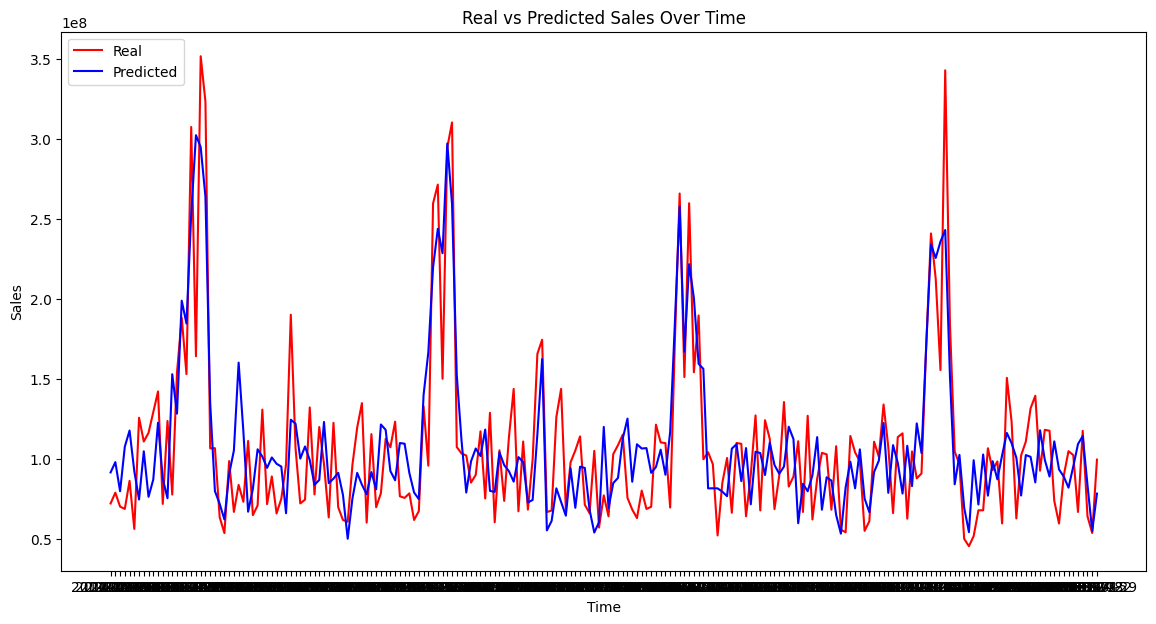

In [64]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame original 'df' por la columna 'wk_strt_dt'
df_sorted = df.sort_values(by='wk_strt_dt')

# Filtrar las columnas relevantes para el conjunto de prueba
X_test = df_sorted[['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr', 'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em', 'mdip_sms', 'mdip_aff', 'mdip_sem']]
y_test = df_sorted['sales']

# Predicciones en el conjunto de prueba
y_pred = multiplicative_func(result.x, *X_test.T.values)

# Crear un gráfico de las ventas reales y predichas a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['wk_strt_dt'], y_test, label='Real', color='red')
plt.plot(df_sorted['wk_strt_dt'], y_pred, label='Predicted', color='blue')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Real vs Predicted Sales Over Time')
plt.legend(loc='upper left')
plt.show()
